# Homework 4: Modeling Text Data

### Team Member 1:
* UNI: mj2776
* Name: Mike Jaron

### Team Member 2 [optional]:
* UNI:  
* Name:


You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated. 

In [2]:
# Add your code for task 1 here. You may use multiple cells. 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

seed = 7

/Users/mikejaron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# get data
df = pd.read_csv('./Vision_Zero_Entry.csv')
print(df.shape)
df.head()

(8533, 11)


,﻿X,Y,OBJECTID,GLOBALID,REQUESTID,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,USERTYPE
0,-71.071329,42.332161,15607,NaN,15607.0,bike facilities don't exist or need improvement,2016-01-19T22:14:26.000Z,Unassigned,0,the roadway is super wide here with no lane ma...,bikes
1,-71.067764,42.374244,15608,NaN,15608.0,"the wait for the ""Walk"" signal is too long",2016-01-19T22:55:29.000Z,Unassigned,0,As someone who walks from SE of the intersecti...,walks
2,-71.066077,42.374768,15609,NaN,15609.0,people cross away from the crosswalks,2016-01-19T22:57:09.000Z,Unassigned,0,I'm one of those people. Many people walk nort...,walks
3,-71.152978,42.345312,16007,NaN,16007.0,people speed,2016-01-19T23:33:20.000Z,Unassigned,0,NaN,walks
4,-71.070658,42.351921,16008,NaN,16008.0,people don't yield while turning,2016-01-19T23:39:45.000Z,Unassigned,0,People do not understand which lane to move in...,drives


In [4]:
# realized we were just using text so no need for this

# print(set(df_og['STREETSEGID']), set(df_og['STATUS']), #set(df_og['GLOBALID']))
# the above all have the same value so I will remove
# df = df_og.drop('STREETSEGID', axis=1)
# df = df.drop('STATUS', axis=1)
# df = df.drop('GLOBALID', axis=1)
# print(df.shape)
# df.head()

In [5]:
# realized we were just using text so no need for this

# convert dates
# time_format = "%Y-%m-%dT%H:%M:%S.000Z"
# epoch = [int(datetime.datetime.strptime(i, time_format).strftime('%s')) for i in df['REQUESTDATE']]
# df['epoch'] = epoch
# df = df.drop('REQUESTDATE', axis=1)

In [6]:
print(len(set(df['REQUESTTYPE'])))
set(df['REQUESTTYPE'])

28


{'" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street',
 '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long',
 '" src="images/06 - Speeding.png"></span>&nbsp;people speed',
 '" src="images/10 - Hard to see.png"></span>&nbsp;it\xe2\x80\x99s hard to see / low visibility',
 '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement',
 '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement',
 '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here',
 "bike facilities don't exist or need improvement",
 "it's too far / too many lanes to cross",
 'it\xe2\x80\x99s hard for people to see each other',
 'it\xe2\x80\x99s hard to see / low visibility',
 'of something that is not listed here',
 'people are not given enough time to cross the street',
 'people cross away from the crosswal

In [7]:
# duplicate items
# create new list of options
dupli = ['enough time to cross the street', 'the roadway surface needs', 'for the "walk" signal',
        "people don't yield while", 'something that is not listed here', 'people speed',
         "sidewalks", 'hard to see / low visibility', 'too many lanes',
        'bike facilities', 'to see']

# combine duplicates and clean up text
new_text = []
for i in df['REQUESTTYPE']:
    new = i.lower()
    for j in dupli:
        if j in new:
            new = j
            break
    if new == 'the roadway surface needs':
        new = 'the roadway surface needs improvement'
    if new == 'enough time to cross the street':
        new = 'not enough time to cross the street'
    if new == "sidewalks":
        new = 'sidewalks/ramps dont exist or need improvement'
    if new == 'it\xe2\x80\x99s hard for people to see each other':
        new = 'its hard for people to see each other'   
    if new == 'too many lanes':
        new = 'too many lanes to cross'
    if new == 'for the "walk" signal':
        new = 'wait for the "walk" signal is too long' 
    if new == 'bike facilities':
        new = 'bike facilities dont exist or need improvement'
    if new == 'to see':
        new = 'hard to see / low visibility'
    if new == 'something that is not listed here':
        new = 'other'
    new_text.append(new)

print(len(set(new_text)), len(new_text))
print(set(new_text))
    
df['REQUESTTYPE_new'] = new_text
try:
    df = df.drop('REQUESTTYPE', axis=1)
except:
    pass

# drop any duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

# df.head()

(13, 8533)
set(['people speed', 'people double park their vehicles', 'bike facilities dont exist or need improvement', 'hard to see / low visibility', 'people cross away from the crosswalks', "people don't yield while", 'other', 'the roadway surface needs improvement', 'too many lanes to cross', 'people run red lights / stop signs', 'not enough time to cross the street', 'wait for the "walk" signal is too long', 'sidewalks/ramps dont exist or need improvement'])
(8533, 11)
(8533, 11)


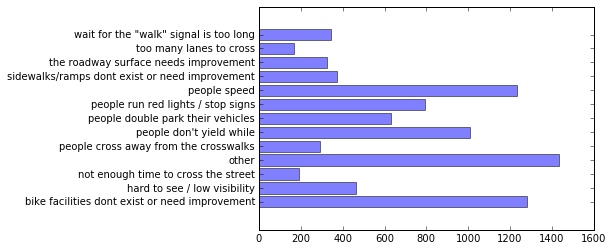

In [8]:
req_plt = df.groupby(['REQUESTTYPE_new'])['OBJECTID'].count()
req_plt = req_plt.reset_index()
# req_plt
y_pos = np.arange(len(req_plt)) 
plt.barh(y_pos, req_plt['OBJECTID'], align='center', alpha=0.5)
plt.yticks(y_pos, req_plt['REQUESTTYPE_new']);

In [9]:
# get rid of any NaN values for comments
df = df.dropna(subset=['COMMENTS'])
df.shape

(6646, 11)

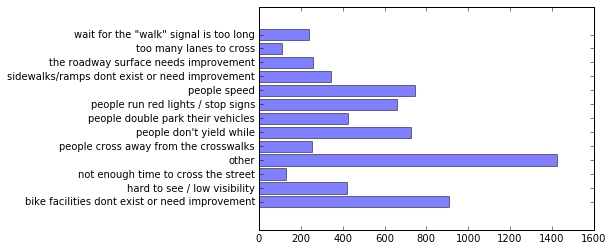

In [10]:
# plot without the NaN's
req_plt = df.groupby(['REQUESTTYPE_new'])['OBJECTID'].count()
req_plt = req_plt.reset_index()
# req_plt
y_pos = np.arange(len(req_plt)) 
plt.barh(y_pos, req_plt['OBJECTID'], align='center', alpha=0.5)
plt.yticks(y_pos, req_plt['REQUESTTYPE_new']);

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

In [11]:
# Add your code for task 2 here. You may use multiple cells. 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [12]:
y = df['REQUESTTYPE_new']
X = df['COMMENTS']
print(X.shape, y.shape)
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=seed)
X_train_text.shape, X_test_text.shape, y_train.shape, y_test.shape

((6646,), (6646,))


((5316,), (1330,), (5316,), (1330,))

In [16]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train_text)
X_test = count_vect.transform(X_test_text)
X_train.shape, X_test.shape
# count_vect.get_feature_names()[::100]

((5316, 5982), (1330, 5982))

In [320]:
# gave lower f1 score

# tfidf = TfidfTransformer()
# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)
# X_train_tf.shape, X_test_tf.shape

In [15]:
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.58721804511278197

In [114]:
score = f1_score(y_test, pred, average='macro')
score

0.55359841597826243

In [115]:
assert score > .54

In [92]:
print(classification_report(y_test, pred, target_names=list(set(y_test))))

                                                precision    recall  f1-score   support

                                  people speed       0.66      0.67      0.67       182
sidewalks/ramps dont exist or need improvement       0.60      0.57      0.59        84
bike facilities dont exist or need improvement       0.43      0.23      0.30        26
         people cross away from the crosswalks       0.48      0.52      0.50       285
                  hard to see / low visibility       0.60      0.55      0.57        51
             people double park their vehicles       0.51      0.49      0.50       145
                       too many lanes to cross       0.76      0.73      0.74        85
                      people don't yield while       0.69      0.70      0.69       133
                                         other       0.66      0.68      0.67       149
         the roadway surface needs improvement       0.51      0.54      0.52        69
        wait for the "walk" sig

[[119   0   0  30   1  10   5   0   5   3   5   3   1]
 [  2  50   0  15   0   5   2   4   5   1   0   0   0]
 [  0   0   6   4   0   3   0   3   4   0   0   1   5]
 [ 24  14   1 146  10  27  11  13  18  15   0   2   4]
 [  2   1   0  10  27   5   1   1   1   1   1   1   0]
 [  6   5   0  26   2  74   0  17   8   3   0   0   4]
 [  3   1   0  17   0   1  62   0   0   0   1   0   0]
 [  2   1   0  14   1   5   0  96  13   0   0   0   1]
 [  7   8   0  10   0  10   2   3 107   1   0   1   0]
 [  4   1   0  14   5   1   0   0   1  39   3   0   1]
 [ 14   0   0   7   2   0   0   0   3   1  24   0   0]
 [  0   2   2   4   2   5   0   0   1   1   0   3   2]
 [  1   0   3   8   0   4   0   2   0   1   0   1  28]]


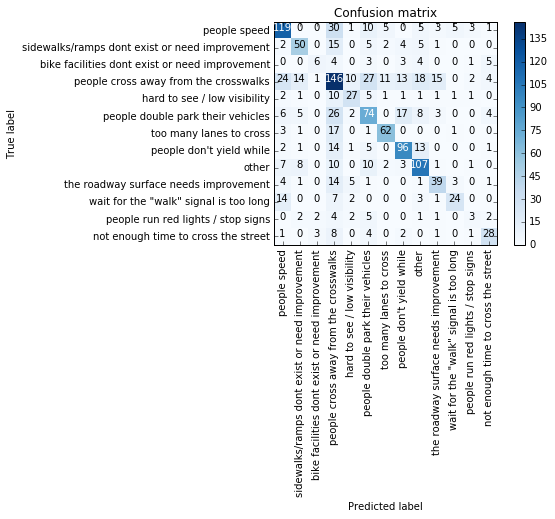

In [18]:
# confusion_matrix(y_test, pred, labels=list(set(y_test)))
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(set(y_test)),
                      title='Confusion matrix')


plt.show()

It looks like the 'people cross away from the crosswalks' has been over predicted and misclassified for many other variables, the top 2 misclassified ones are 'people speed' and 'people double park their vehicles' and the top 2 true variables that were over predicted are 'people speed' and 'people double park their vehicles'

# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

In [21]:
# Add your code for task 3 here. You may use multiple cells. 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [415]:
y = df['REQUESTTYPE_new']
X = df['COMMENTS']

In [353]:
# does not work well
# adding in some new features
# X = pd.DataFrame(df['COMMENTS'])
# X['char_len'] = [len(i) for i in df['COMMENTS']]
# X['word_len'] = [len(str(i).split()) for i in df['COMMENTS']]
# print(X.head(), y.shape, X.shape)
# count_vect = CountVectorizer(min_df=4, ngram_range=(1,3))
# X_text = count_vect.fit_transform(X['COMMENTS'])
# # combine new features
# X_new = X_text.todense()
# X_new = np.hstack((X_new, np.array(X['char_len']).reshape(6646,1) ))
# X_new = np.hstack((X_new, np.array(X['word_len']).reshape(6646,1) ))
# X_text.shape, X_new.shape

# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, stratify=y, random_state=seed)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6646, 12405), (6646, 12407))

In [363]:
# does not work as expected
# lr_pipe = make_pipeline(Normalizer(copy=True, norm='l2'),\
#                         LogisticRegression(C=10))
# lr = lr_pipe.fit(X_train, y_train)
# pred = lr.predict(X_test)
# print(lr.score(X_test, y_test))
# print(f1_score(y_test, pred, average='macro')) 

0.287969924812
0.108131007591


In [416]:
# back to original
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=seed)
X_train_text.shape, X_test_text.shape, y_train.shape, y_test.shape

((5316,), (1330,), (5316,), (1330,))

In [41]:
# takes to long for travis

# try grid searching everything
# param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
#              "normalizer": [None, Normalizer()]}
# grid = GridSearchCV(make_pipeline(CountVectorizer(min_df=4), Normalizer(), LogisticRegression()),
#                     param_grid=param_grid, cv=10, scoring="f1_macro")
# grid.fit(X_train_text, y_train)
# grid.best_params_

{'logisticregression__C': 10, 'normalizer': Normalizer(copy=True, norm='l2')}

In [368]:
# testing new params
lr_pipe = make_pipeline(CountVectorizer(min_df=4, ngram_range=(1,3)), Normalizer(copy=True, norm='l2'),\
                        LogisticRegression(C=10))
lr_pipe.fit(X_train_text, y_train)
pred = lr_pipe.predict(X_test_text)
print(lr_pipe.score(X_test_text, y_test))
print(f1_score(y_test, pred, average='macro'))

0.615789473684
0.571616923254


In [45]:
# takes to long for travis

# try grid searching everything
# param_grid = {"countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3), (1, 4)],
#              "countvectorizer__min_df": [3, 4, 5]}
# grid = GridSearchCV(make_pipeline(CountVectorizer(), Normalizer(copy=True, norm='l2'), \
#                                   LogisticRegression(C=10)),
#                     param_grid=param_grid, cv=10, scoring="f1_macro")
# grid.fit(X_train_text, y_train)
# grid.best_params_

{'countvectorizer__min_df': 3, 'countvectorizer__ngram_range': (1, 2)}

In [174]:
# testing new params,

lr_pipe = make_pipeline(CountVectorizer(min_df=3, ngram_range=(1,2)), Normalizer(copy=True, norm='l2'),\
                        LogisticRegression(C=10))
lr_pipe.fit(X_train_text, y_train)
pred = lr_pipe.predict(X_test_text)
print(lr_pipe.score(X_test_text, y_test))
print(f1_score(y_test, pred, average='macro'))

0.613533834586
0.5685484745


In [52]:
# takes to long for travis

# try grid searching everything
# param_grid = {"countvectorizer__analyzer": ["word", "char", "char_wb"]}
# grid = GridSearchCV(make_pipeline(CountVectorizer(min_df=3, ngram_range=(1,2)), Normalizer(copy=True, norm='l2'), \
#                                   LogisticRegression(C=10)),
#                     param_grid=param_grid, cv=10, scoring="f1_macro")
# grid.fit(X_train_text, y_train)
# grid.best_params_

{'countvectorizer__analyzer': 'word'}

In [417]:
# final model
lr_pipe = make_pipeline(CountVectorizer(min_df=4, ngram_range=(1,3)), Normalizer(copy=True, norm='l2'),\
                        LogisticRegression(C=10))
lr_pipe.fit(X_train_text, y_train)
pred = lr_pipe.predict(X_test_text)
print(lr_pipe.score(X_test_text, y_test))
score = f1_score(y_test, pred, average='macro')
score

0.615789473684


0.57161692325406666

In [418]:
assert score > .57

# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

[[125   0   0  27   0   7   6   0   3   6   6   1   1]
 [  2  52   0  13   1   5   2   1   6   2   0   0   0]
 [  0   0   6   6   0   4   0   2   2   0   0   0   6]
 [ 18  14   1 172  10  18   6  11  13  15   3   0   4]
 [  2   1   0  11  28   3   1   2   0   2   1   0   0]
 [  5   1   0  31   3  80   1  12   7   2   0   0   3]
 [  4   1   0  16   0   0  61   0   1   1   1   0   0]
 [  1   1   0  17   0   6   0  96  12   0   0   0   0]
 [  4   9   0  15   1  10   2   4 102   1   0   0   1]
 [  7   0   0  11   4   2   1   1   1  39   3   0   0]
 [ 14   0   0   8   1   0   0   0   3   2  23   0   0]
 [  0   1   2  10   1   3   0   0   1   0   0   3   1]
 [  0   0   2   7   1   2   0   3   1   0   0   0  32]]


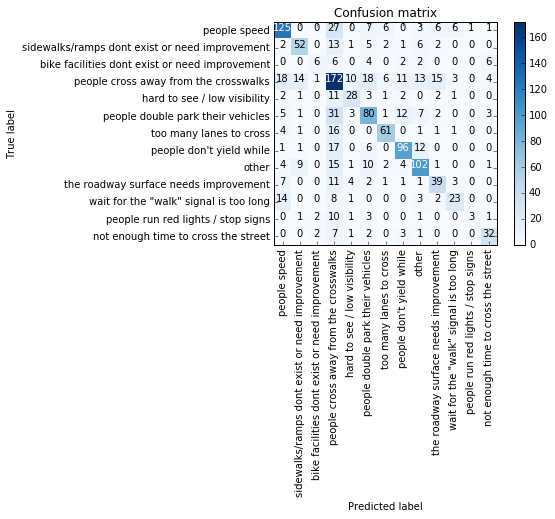

In [57]:
# Add your code for task 4 here. You may use multiple cells. 
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(set(y_test)),
                      title='Confusion matrix')
plt.show()

In [90]:
print(classification_report(y_test, pred, target_names=list(set(y_test))))

                                                precision    recall  f1-score   support

                                  people speed       0.66      0.67      0.67       182
sidewalks/ramps dont exist or need improvement       0.60      0.57      0.59        84
bike facilities dont exist or need improvement       0.43      0.23      0.30        26
         people cross away from the crosswalks       0.48      0.52      0.50       285
                  hard to see / low visibility       0.60      0.55      0.57        51
             people double park their vehicles       0.51      0.49      0.50       145
                       too many lanes to cross       0.76      0.73      0.74        85
                      people don't yield while       0.69      0.70      0.69       133
                                         other       0.66      0.68      0.67       149
         the roadway surface needs improvement       0.51      0.54      0.52        69
        wait for the "walk" sig

In [72]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))

    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

0.587969924812
0.553598415978


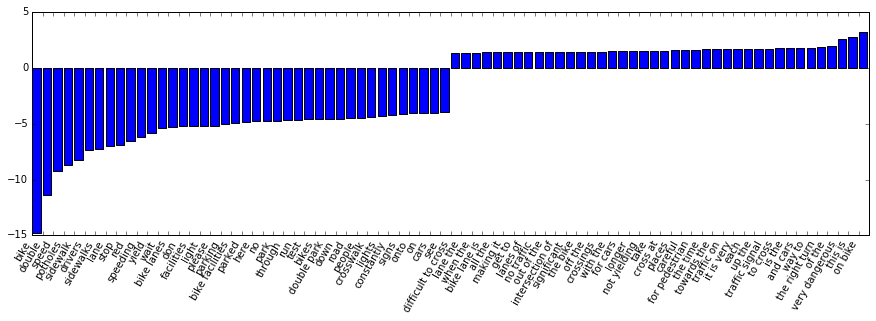

In [441]:
vect = CountVectorizer(min_df=4, ngram_range=(1,3))
X_train = vect.fit_transform(X_train_text)
feature_names = vect.get_feature_names()
X_test = vect.transform(X_test_text)

# norm = Normalizer(copy=True, norm='l2')
lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(lr.score(X_test, y_test))
print(f1_score(y_test, pred, average='macro'))
plt.figure(figsize=(15, 4))
plot_important_features(np.sum(lr.coef_, axis=0), np.array(feature_names), top_n=40)

# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

In [1]:
# Add your code for task 5 here. You may use multiple cells. 
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.cluster import adjusted_rand_score

In [18]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [16]:
n_samples = 2000
n_features = 10000
n_topics = true_k = np.unique(y).shape[0]
n_top_words = 10
labels = y
# Use tf-idf features for NMF.
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X)

# Fit the NMF model
nmf = NMF(n_components=n_topics, random_state=seed,
          alpha=.1, l1_ratio=.5)
nmf.fit(tfidf)

preds = np.argmax(nmf.transform(tfidf), 1)
print("\nAdjusted Rand-Index: %.3f \n"
      % adjusted_rand_score(labels, preds))

print("Topics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Adjusted Rand-Index: 0.082 

Topics in NMF model:


NameError: name 'print_top_words' is not defined

In [183]:

true_k = np.unique(y).shape[0]

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

km.fit(tfidf)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

print("\nAdjusted Rand-Index: %.3f \n"
      % adjusted_rand_score(labels, km.labels_))

terms = tfidf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :n_top_words]:
        print(' %s' % terms[ind])
    print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=13, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Top terms per cluster:

Adjusted Rand-Index: 0.084 

Cluster 0:
 hubway
 station
 bikes
 sidewalk
 convenience
 store
 bad
 bikers
 time
 right
()
Cluster 1:
 lane
 bike
 cars
 right
 need
 people
 park
 traffic
 road
 markings
()
Cluster 2:
 crosswalks
 yield
 pedestrians
 don
 drivers
 turning
 people
 cars
 right
 cross
()
Cluster 3:
 traffic
 cars
 intersection
 st
 coming
 turning
 parked
 hard
 dangerous
 difficult
()
Cluster 4:
 stop
 sign
 signs
 drivers
 cars
 people
 intersection
 street
 run
 speed
()
Cluster 5:
 street
 people
 speed
 sidewalk
 road
 dangerous
 sidewalks
 cars
 area
 cross
()
Cluster 6:
 red
 light
 run
 lights
 cars
 people
 turn
 green
 intersection
 drivers
()
Cluster 7:
 parking
 double
 park
 people
 street
 parked
 lot
 cars
 lane
 traffic
()


In [31]:
# X.shape, labels.shape, tf.shape, preds.shape

In [252]:
# Use tf (raw term count) features for LDA.
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=3,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(X)

lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=seed)
lda.fit(tf)

preds = np.argmax(lda.transform(tf), 1)
print("\nAdjusted Rand-Index: %.3f \n"
      % adjusted_rand_score(labels, preds))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Adjusted Rand-Index: 0.077 


Topics in LDA model:
Topic #0:
lane bike street cars way traffic lanes people st right
Topic #1:
light red run people lights ave intersection hit cars corner
Topic #2:
bridge going bikes block trucks intersection path traffic crossing pedestrian
Topic #3:
green tracks train arrow direction coming vehicle opposite st old
Topic #4:
rush hour cycle hours location track morning race evening house
Topic #5:
vehicles speed road limit mph parked double main speeds trucks
Topic #6:
children cut play young american legion need garage dogs jamaica
Topic #7:
pedestrians walk cars cross traffic light turn crosswalk signal crossing
Topic #8:
day police city huntington stopping poor visibility actually needed median
Topic #9:
stop people sign street bus park signs drivers crosswalk school
Topic #10:
street area road narrow sidewalk people sidewalks station cars dangerous
Topic #11:
sidewalk zone potholes ramp forcing westbound bike aren killed large
Topic #12:
crosswal

In [254]:
# seems k-means did best, just slightly better than NMF and LDA did worst

# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


In [14]:
# Add your code for task 6 here. You may use multiple cells. 
X_other = df['COMMENTS'][df['REQUESTTYPE_new'] == 'other']
y_other = df['REQUESTTYPE_new'][df['REQUESTTYPE_new'] == 'other']

In [17]:
# topic modeling for other category
true_k = 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(X_other)

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
km.fit(tfidf)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :n_top_words]:
        print(' %s' % terms[ind])
    print()

Cluster 0:
 lane
 way
 turn
 left
 street
 cars
 people
 traffic
 intersection
 right
()
Cluster 1:
 stop
 crosswalk
 cross
 pedestrians
 walk
 light
 sign
 signal
 cars
 people
()


In [397]:
set(y)

{'bike facilities dont exist or need improvement',
 'hard to see / low visibility',
 'not enough time to cross the street',
 'other',
 'people cross away from the crosswalks',
 "people don't yield while",
 'people double park their vehicles',
 'people run red lights / stop signs',
 'people speed',
 'sidewalks/ramps dont exist or need improvement',
 'the roadway surface needs improvement',
 'too many lanes to cross',
 'wait for the "walk" signal is too long'}

In [18]:
km.cluster_centers_.shape, tfidf.shape, X_other.shape, X.shape, km.labels_.shape

((2, 1455), (1425, 1455), (1425,), (6646,), (1425,))

In [19]:
new_topic_dict = {0: 'intersections are congested and dangerous',
                 1:'turning cars are dangerous'}
y_other_new = []
for i,j in zip(X_other, km.labels_):
#     print(i,j)
    y_other_new.append(new_topic_dict[j])


In [22]:
# classification with just the former other category
X_train_text1, X_test_text1, y_train1, y_test1 = train_test_split(X_other, y_other_new, test_size=0.20, stratify=y_other, \
                                                              random_state=seed)
lr_pipe = make_pipeline(CountVectorizer(min_df=4, ngram_range=(1,3)), Normalizer(copy=True, norm='l2'),\
                        LogisticRegression(C=10))
lr_pipe.fit(X_train_text1, y_train1)
pred = lr_pipe.predict(X_test_text1)
print(lr_pipe.score(X_test_text1, y_test1))
score = f1_score(y_test1, pred, average='macro')
score

0.971929824561


/Users/mikejaron/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


0.95725213739313031

In [23]:
assert score > .53

In [33]:
y_other_df = pd.DataFrame(y_other)
y_other_df.reset_index(inplace=True)
y_other_df['new'] = y_other_new
# y_other_df.head()
y_new = y
for i in range(len(y_other_df)):
    print i, y_other_df['index'][i]
    print y_new[i]
    break
y_new

0 24
bike facilities dont exist or need improvement


0       bike facilities dont exist or need improvement
1               wait for the "walk" signal is too long
2                people cross away from the crosswalks
4                             people don't yield while
5                people cross away from the crosswalks
8       bike facilities dont exist or need improvement
9       bike facilities dont exist or need improvement
10      bike facilities dont exist or need improvement
11                                        people speed
12                  people run red lights / stop signs
17               people cross away from the crosswalks
18                            people don't yield while
19      bike facilities dont exist or need improvement
20      bike facilities dont exist or need improvement
21      bike facilities dont exist or need improvement
22                             too many lanes to cross
23                            people don't yield while
24                                               other
25        

In [75]:
X_train_text2, X_test_text2, y_train2, y_test2 = train_test_split(, y, test_size=0.20, stratify=y_other, \
                                                              random_state=seed)
lr_pipe = make_pipeline(CountVectorizer(min_df=4, ngram_range=(1,3)), Normalizer(copy=True, norm='l2'),\
                        LogisticRegression(C=10))
lr_pipe.fit(X_train_text1, y_train1)
pred = lr_pipe.predict(X_test_text1)
print(lr_pipe.score(X_test_text1, y_test1))
score = f1_score(y_test1, pred, average='macro')
score

,﻿X,Y,OBJECTID,GLOBALID,REQUESTID,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,USERTYPE,REQUESTTYPE_new
0,-71.071329,42.332161,15607,NaN,15607.0,2016-01-19T22:14:26.000Z,Unassigned,0,the roadway is super wide here with no lane ma...,bikes,bike facilities dont exist or need improvement
1,-71.067764,42.374244,15608,NaN,15608.0,2016-01-19T22:55:29.000Z,Unassigned,0,As someone who walks from SE of the intersecti...,walks,"wait for the ""walk"" signal is too long"
2,-71.066077,42.374768,15609,NaN,15609.0,2016-01-19T22:57:09.000Z,Unassigned,0,I'm one of those people. Many people walk nort...,walks,people cross away from the crosswalks
4,-71.070658,42.351921,16008,NaN,16008.0,2016-01-19T23:39:45.000Z,Unassigned,0,People do not understand which lane to move in...,drives,people don't yield while
5,-71.059937,42.358693,16407,NaN,16407.0,2016-01-20T21:28:27.000Z,Unassigned,0,I rarely use the crosswalk because the light h...,walks,people cross away from the crosswalks
8,-71.093018,42.349864,13609,NaN,13609.0,2016-01-15T21:46:24.000Z,Unassigned,0,"I feel scared biking on the ""green carpet"" bik...",bikes,bike facilities dont exist or need improvement
9,-71.091526,42.349158,13610,NaN,13610.0,2016-01-15T21:47:56.000Z,Unassigned,0,While I love that the Comm Ave bike lane is to...,bikes,bike facilities dont exist or need improvement
10,-71.067408,42.352338,13611,NaN,13611.0,2016-01-15T21:49:22.000Z,Unassigned,0,Need a bike facility to connect Boylston St to...,bikes,bike facilities dont exist or need improvement
11,-71.069229,42.345068,13612,NaN,13612.0,2016-01-15T21:52:00.000Z,Unassigned,0,"3 lane, no parking either side. SPEEDWAY. No s...",walks,people speed
12,-71.077320,42.350091,13613,NaN,13613.0,2016-01-15T21:54:47.000Z,Unassigned,0,People who are walking constantly run the red ...,bikes,people run red lights / stop signs


# Extra Credit [Up to +20 points]

Use a word embedding representation like word2vec for step 3 and or step 6. 

In [7]:
# Add your code for extra credit here. You may use multiple cells. 

